<a href="https://colab.research.google.com/github/dani1974/DanielaRosasPUC/blob/main/sprint2_Aula3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning - Aluna Daniela Rosas
###Aula 03: Recursos Avançados Aplicados ao Aprendizado Supervisionado
###Prática 4

In [97]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

In [81]:
# Imports necessários
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.datasets import load_diabetes # para importar o dataset diabetes
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import mean_squared_error # métrica de avaliação MSE
from sklearn.linear_model import LinearRegression # algoritmo Regressão Linear
from sklearn.linear_model import Ridge # algoritmo Regularização Ridge
from sklearn.linear_model import Lasso # algoritmo Regularização Lasso
from sklearn.neighbors import KNeighborsRegressor # algoritmo KNN
from sklearn.tree import DecisionTreeRegressor # algoritmo Árvore de Regressão
from sklearn.svm import SVR # algoritmo SVM

##Carregando o Dataset = Doenças

In [64]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/dani1974/DanielaRosasPUC/main/Dados/Disease_symptom_and_patient_profile_dataset.csv"

# Lê o arquivo 
dataset = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


##tratando a base

In [65]:
dataset = dataset.rename(columns={'Disease': 'Doenças','Fever': 'Febre','Cough': 'Tosse','Fatigue': 'Fadiga','Difficulty Breathing': 'Dif_respirar','Age': 'Idade',
                        'Gender': 'Sexo','Blood Pressure': 'Pressão','Cholesterol Level': 'Colesterol','Outcome Variable': 'Target'})
dataset.head()
a= list(dataset.columns)
dataset.head()




,Doenças,Febre,Tosse,Fadiga,Dif_respirar,Idade,Sexo,Pressão,Colesterol,Target
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [66]:
replacements = {"Yes": "1", "No": "0", "Female": "0", "Male": "1", "Low": "-1", "Normal": "0","High":"1","Positive":"1","Negative":"0"}
dataset = dataset.replace(replacements)
dataset[dataset.values == pd.isna(np.nan)]
dataset.head()


,Doenças,Febre,Tosse,Fadiga,Dif_respirar,Idade,Sexo,Pressão,Colesterol,Target
0,Influenza,1,0,1,1,19,0,-1,0,1
1,Common Cold,0,1,1,0,25,0,0,0,0
2,Eczema,0,1,1,0,25,0,0,0,0
3,Asthma,1,1,0,1,25,1,0,0,1
4,Asthma,1,1,0,1,25,1,0,0,1


In [9]:
dataset.groupby(by='Doenças').mean()


,Idade
Doenças,
Acne,40.000000
Allergic Rhinitis,40.333333
Alzheimer's Disease,67.000000
Anemia,50.000000
Anxiety Disorders,43.166667
...,...
Ulcerative Colitis,36.000000
Urinary Tract Infection,40.200000
Urinary Tract Infection (UTI),43.333333


In [67]:
# Preparação dos dados
dataset.drop('Doenças',axis=1,inplace=True)
dataset.head()

,Febre,Tosse,Fadiga,Dif_respirar,Idade,Sexo,Pressão,Colesterol,Target
0,1,0,1,1,19,0,-1,0,1
1,0,1,1,0,25,0,0,0,0
2,0,1,1,0,25,0,0,0,0
3,1,1,0,1,25,1,0,0,1
4,1,1,0,1,25,1,0,0,1


In [68]:
y = dataset['Target']
x = dataset.drop('Target',axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=7)
#x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=7)

In [69]:
x_train , y_train

(    Febre Tosse Fadiga Dif_respirar  Idade Sexo Pressão Colesterol
 246     0     1      0            0     55    0       0          1
 157     1     1      1            0     42    0       1          1
 320     1     1      1            0     65    0       1          1
 66      1     1      1            0     35    0       0          0
 118     0     0      1            0     40    1       1          0
 ..    ...   ...    ...          ...    ...  ...     ...        ...
 211     0     0      1            0     50    1       0          1
 67      0     0      1            0     35    1       0          0
 25      1     1      1            0     30    1       1          1
 196     1     1      1            0     45    0       1          1
 175     0     0      1            0     45    1       1          1
 
 [279 rows x 8 columns],
 246    0
 157    1
 320    1
 66     0
 118    0
       ..
 211    0
 67     0
 25     0
 196    1
 175    0
 Name: Target, Length: 279, dtype: object)

In [70]:
# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

In [71]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7) 

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
modelo = []
resultado = []
nome_result= []

# Preparando os modelos e adicionando-os em uma lista
modelo.append(('LR', LinearRegression()))
modelo.append(('Ridge', Ridge()))
modelo.append(('Lasso', Lasso()))
modelo.append(('KNN', KNeighborsRegressor()))
modelo.append(('CART', DecisionTreeRegressor()))
modelo.append(('SVM', SVR()))

LR: MSE 0.22 (0.04) - RMSE 0.47
Ridge: MSE 0.22 (0.04) - RMSE 0.47
Lasso: MSE 0.25 (0.01) - RMSE 0.50
KNN: MSE nan (nan) - RMSE nan
CART: MSE 0.24 (0.09) - RMSE 0.49
SVM: MSE 0.34 (0.06) - RMSE 0.58


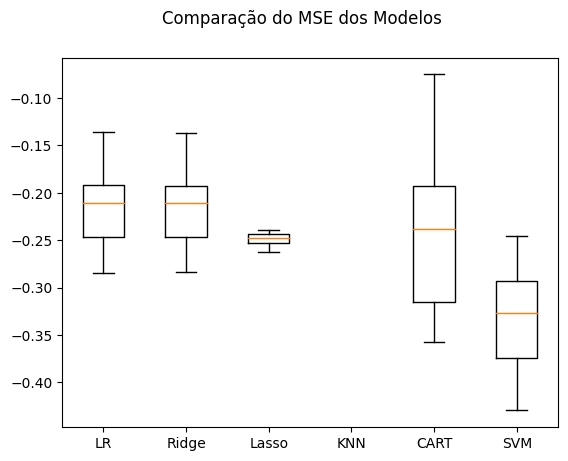

In [72]:
# Avaliando um modelo por vez
for name, model in modelo:
  cv_resultados = cross_val_score(model, x_train, y_train, cv=kfold, scoring='neg_mean_squared_error') # validação crizada cv
  resultado.append(cv_resultados) # adicionando o resultado da validação cruzada 
  nome_result.append(name) # adicionando o nome do modelo

  # imprime MSE, desvio padrão do MSE e RMSE dos 10 resultados da validação cruzada
  msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_resultados.mean()), cv_resultados.std(), np.sqrt(abs(cv_resultados.mean())))
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure() 
fig.suptitle('Comparação do MSE dos Modelos') 
ax = fig.add_subplot(111) 
plt.boxplot(resultado) 
ax.set_xticklabels(nome_result) 
plt.show()

In [73]:
# Criando um modelo com todo o conjunto de treino
model = LinearRegression()
model.fit(x_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(x_test) 

# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y_test, predictions)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))

MSE 0.22
RMSE 0.47


In [74]:
print(predictions)

[0.71981938 0.58562583 0.31513049 0.70091324 0.69327846 0.72733636
 0.86432292 0.86919227 0.5904676  0.50066521 0.73707507 0.31999984
 0.8475207  0.15603124 0.58781998 0.34431903 0.54573706 0.35771955
 0.45280626 0.70704281 0.95868313 0.69327846 0.57101777 0.43013175
 0.32973855 0.68240989 0.5092615  0.38007865 0.6631284  0.60314066
 0.44712989 0.49526432 0.82400853 0.62084955 0.78983282 0.43353563
 0.411086   0.5092615  0.73439987 0.43739118 0.79166431 0.54708595
 0.34528055 0.44712989 0.46420636 0.83778199 0.8475207  0.45199924
 0.31999984 0.30271658 0.67534638 0.37418397 0.60507567 0.72933678
 0.57993631 0.48130559 0.33985228 0.29565307 0.35771955 0.35864197
 0.60507567 0.72249459 0.72736394 0.48827888 0.54067178 0.48338194
 0.72733636 0.3842078  0.76151425 0.6412609 ]


In [88]:
forest1 = RandomForestClassifier(criterion='entropy',max_depth=8)
model1 = forest1.fit(x_train,y_train)
model1.score(x_test,y_test)

0.7714285714285715

In [92]:
y_pred = model1.predict(x_test)
y_pred


array(['1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '0', '1',
       '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '1',
       '0', '1', '1', '1', '1', '0', '1', '1', '1', '0', '0', '0', '0',
       '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1',
       '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1',
       '0', '1', '0', '1', '0'], dtype=object)

In [93]:
y_test

177    0
30     0
206    0
346    1
317    1
      ..
268    1
249    0
139    1
80     1
327    0
Name: Target, Length: 70, dtype: object

In [94]:
accuracy_score(y_test, y_pred)

0.7714285714285715

In [105]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[26 11]
 [ 5 28]]


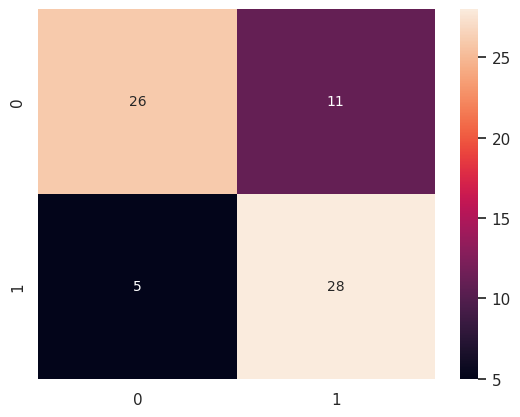

In [123]:
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,annot_kws={"size":10})
sns.set(font_scale=1)
plt.show()

###Nesta matriz de confusão temos 16 resultados ruins em nosso modelo. Podemos descobrir isso se melhorarmos nosso modelo alimentando-o com mais dados e calculando as pontuações de erro.


In [109]:
pipe = Pipeline([('scaler', MinMaxScaler()),('rfc', RandomForestClassifier())])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.8142857142857143

In [110]:
y_pred2 = pipe.predict(x_test)

In [111]:
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)

[[27 10]
 [ 3 30]]


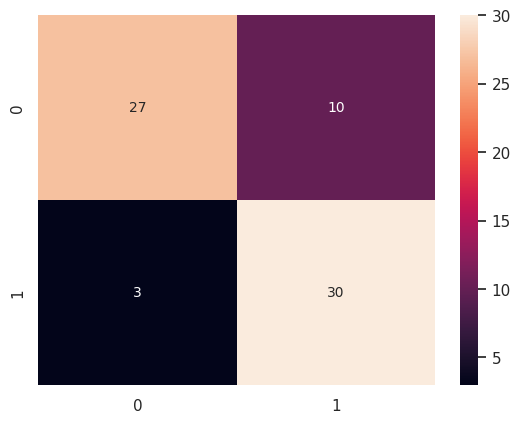

In [124]:
sns.heatmap(confusion_matrix(y_test, y_pred2),annot=True,annot_kws={"size":10})
sns.set(font_scale=1)
plt.show()